# Lab 10: Fully Connected Network

In this lab you will implement your first neural network, consisting of a series of fully-connected layers. This type of neural network is known as a fully-connected network (FCN), and we will implement it using Tensorflow and Keras.

<a name="1"></a>
## 1. Load the data




In [13]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

(X_train, Y_train), (x_test, y_test)= mnist.load_data()  #load the MNIST dataset

#normalization so that data lays in [0,1] interval
X_train, x_test= X_train/255.0, x_test/255.0

num_classes=10

#first we use only 500 images as our train set
X_train , Y_train= X_train[:500] , Y_train[:500]

# splitting the train data into train and validation data
x_train, x_val,y_train,y_val = train_test_split(X_train, Y_train, test_size=0.1)

print(x_train.shape,y_train.shape, x_val.shape,y_val.shape)

#use one-hot encoding for the desired output labels y
y_train_1hot = keras.utils.to_categorical(y_train, num_classes)
y_test_1hot  = keras.utils.to_categorical(y_test, num_classes)
y_val_1hot   = keras.utils.to_categorical(y_val, num_classes)



(450, 28, 28) (450,) (50, 28, 28) (50,)


<a name="1"></a>
## 2. Build the model

In [15]:
# Build model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   # this is a special input layer, defined by the size of the input images
    keras.layers.Dense(128, activation='relu'),   # first layer with 128 output classes
    keras.layers.Dense(64, activation='relu'),    # second layer with 64 output classes
    # keras.layers.Dropout(0.2),                  # with the possibility of 20% a node in a layer may be ignored
    keras.layers.Dense(10, activation='softmax')  # output layer with 10 output classes (number of classes)
])

# Compile model
model.compile(optimizer='Adam',                   # choose your optimizer
              loss='categorical_crossentropy',
              metrics=['accuracy'])

<a name="1"></a>
## 3. Train the model





In [16]:
#train the model
r = model.fit(x_train , y_train_1hot ,batch_size=64, validation_data=(x_val, y_val_1hot),epochs=25)  #choose your batch size


Epoch 1/25
8/8 [==============================] - 1s 40ms/step - loss: 2.0580 - accuracy: 0.3622 - val_loss: 1.6266 - val_accuracy: 0.6800
Epoch 2/25
8/8 [==============================] - 0s 12ms/step - loss: 1.4172 - accuracy: 0.7400 - val_loss: 1.2072 - val_accuracy: 0.7000
Epoch 3/25
8/8 [==============================] - 0s 14ms/step - loss: 0.9930 - accuracy: 0.8067 - val_loss: 0.9084 - val_accuracy: 0.8000
Epoch 4/25
8/8 [==============================] - 0s 12ms/step - loss: 0.7197 - accuracy: 0.8467 - val_loss: 0.7614 - val_accuracy: 0.8000
Epoch 5/25
8/8 [==============================] - 0s 12ms/step - loss: 0.5321 - accuracy: 0.8822 - val_loss: 0.6978 - val_accuracy: 0.7400
Epoch 6/25
8/8 [==============================] - 0s 10ms/step - loss: 0.4154 - accuracy: 0.8956 - val_loss: 0.5764 - val_accuracy: 0.8600
Epoch 7/25
8/8 [==============================] - 0s 9ms/step - loss: 0.3364 - accuracy: 0.9156 - val_loss: 0.5186 - val_accuracy: 0.8600
Epoch 8/25
8/8 [============

<a name="1"></a>
## 4. Validating the model

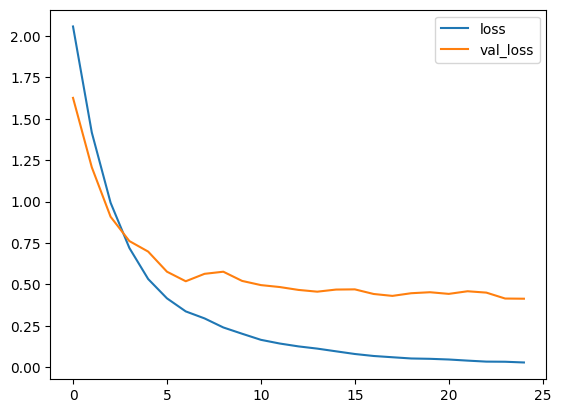

In [17]:
#plot loss
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

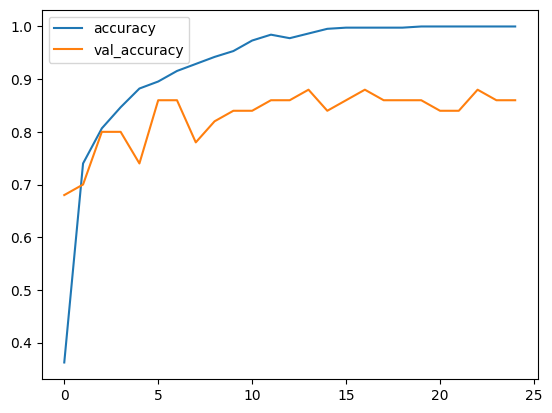

In [18]:
#plot accuracy
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()


<a name="1"></a>
## 5. Testing the accuracy of the model

In [19]:
# Evaluate
loss, accuracy = model.evaluate(x_test, y_test_1hot)  # Evaluating the model on the test set

print("loss:{:.2f} , accuracy:{:.2f}%".format(loss, accuracy * 100))


313/313 [==============================] - 1s 3ms/step - loss: 0.5838 - accuracy: 0.8325
loss:0.58 , accuracy:83.25%


313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 897    0   16    3    5   34   15    4    4    2]
 [   0 1106    3    1    1    2    3    1   18    0]
 [   9   22  872   14   22    2   26   21   42    2]
 [   6    3   35  831    0   58    8   22   33   14]
 [   0    4   10    1  852    0   20    7    3   85]
 [  32   10   20   96   36  584   17   16   58   23]
 [  26    8   37    0   14   33  837    1    1    1]
 [   0   20   23    4   11    0    1  899   12   58]
 [  21   22   15   43   13   29   28   37  714   52]
 [  17    4   15   15   60    8    0  146   11  733]]


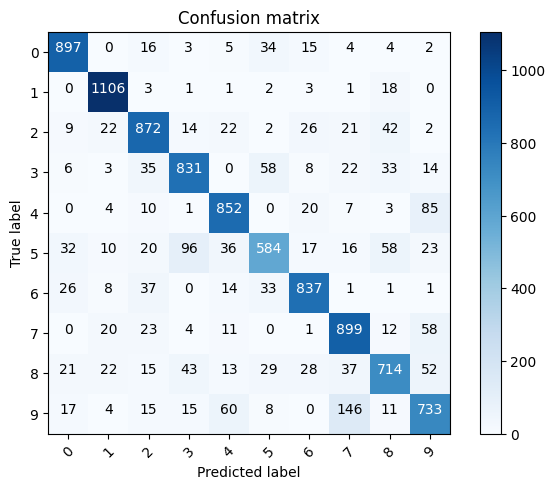

In [20]:
#confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test= model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm,list(range(10)))

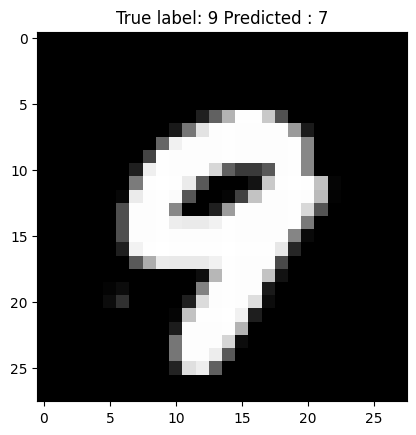

In [21]:
# let's show some misclassified images

# gather all misclassified indices (where function returns 2 elements, we only need the first one so we use [0])
misclassified_idx = np.where(p_test != y_test)[0]

# randomly choose a misclassified index. you can set i as any class number you prefer
i = np.random.choice(misclassified_idx)

# if we do not say it is gray, the image will show up as a heat map
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted : %s"%(y_test[i], p_test[i]));